# Intro to CNN and CV

In [1]:
# import zipfile


# zip_ref= zipfile.ZipFile(r"C:\Users\Administrator\Downloads\pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Administrator\\Downloads\\pizza_steak.zip'

In [1]:
# inspect the data 

%ls pizza_steak

 Volume in drive C is OS
 Volume Serial Number is FC4A-D313

 Directory of c:\Users\Administrator\Documents\aiml\Tensorflow\pizza_steak

01/10/2024  10:54 PM    <DIR>          .
01/11/2024  12:19 PM    <DIR>          ..
01/10/2024  10:54 PM    <DIR>          test
01/10/2024  10:54 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  228,281,438,208 bytes free


In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak\test
There are 0 directories and 250 in pizza_steak\test\pizza
There are 0 directories and 250 in pizza_steak\test\steak
There are 2 directories and 0 in pizza_steak\train
There are 0 directories and 750 in pizza_steak\train\pizza
There are 0 directories and 750 in pizza_steak\train\steak


In [3]:
# another way

num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## visualizing

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
#lets visualise the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class

    random_image=random.sample(os.listdir(target_folder),1)

    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"image shape: {img.shape}")
    return img

image shape: (512, 512, 3)


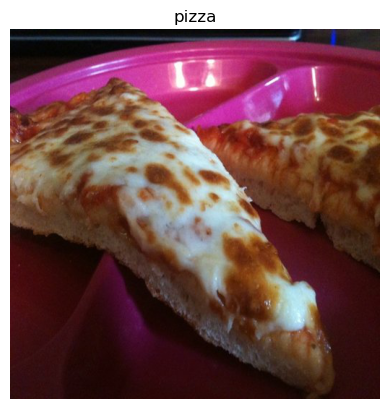

In [6]:
img= view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")


In [7]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 4, 14, 16],
        [ 5, 15, 17],
        [ 6, 16, 18],
        ...,
        [52, 44, 42],
        [55, 47, 45],
        [50, 42, 40]],

       [[ 7, 15, 18],
        [ 7, 15, 18],
        [ 7, 15, 18],
        ...,
        [50, 42, 40],
        [53, 45, 43],
        [48, 40, 38]],

       [[11, 15, 18],
        [10, 14, 17],
        [ 8, 12, 15],
        ...,
        [44, 39, 36],
        [46, 41, 38],
        [41, 36, 33]],

       ...,

       [[42, 11, 16],
        [45, 15, 17],
        [48, 18, 20],
        ...,
        [44, 13, 11],
        [42, 11,  9],
        [42,  8,  7]],

       [[44, 15, 19],
        [44, 15, 19],
        [46, 16, 18],
        ...,
        [42, 11,  9],
        [41, 10,  8],
        [42,  8,  7]],

       [[45, 16, 20],
        [43, 14, 18],
        [41, 11, 13],
        ...,
        [40,  9,  7],
        [41, 10,  8],
        [43,  9,  8]]], dtype=uint8)>

In [8]:
img.shape

(512, 512, 3)

In [9]:
#these are in RGB color channels. Lets make the no. (of colors 0-255) from 0-1

img/255.0

array([[[0.01568627, 0.05490196, 0.0627451 ],
        [0.01960784, 0.05882353, 0.06666667],
        [0.02352941, 0.0627451 , 0.07058824],
        ...,
        [0.20392157, 0.17254902, 0.16470588],
        [0.21568627, 0.18431373, 0.17647059],
        [0.19607843, 0.16470588, 0.15686275]],

       [[0.02745098, 0.05882353, 0.07058824],
        [0.02745098, 0.05882353, 0.07058824],
        [0.02745098, 0.05882353, 0.07058824],
        ...,
        [0.19607843, 0.16470588, 0.15686275],
        [0.20784314, 0.17647059, 0.16862745],
        [0.18823529, 0.15686275, 0.14901961]],

       [[0.04313725, 0.05882353, 0.07058824],
        [0.03921569, 0.05490196, 0.06666667],
        [0.03137255, 0.04705882, 0.05882353],
        ...,
        [0.17254902, 0.15294118, 0.14117647],
        [0.18039216, 0.16078431, 0.14901961],
        [0.16078431, 0.14117647, 0.12941176]],

       ...,

       [[0.16470588, 0.04313725, 0.0627451 ],
        [0.17647059, 0.05882353, 0.06666667],
        [0.18823529, 0

## end-to-end example
`· Load our images`

`· Preprocess our images`

`· Build a CNN to find patterns in our images`

`. Compile our CNN`

`. Fit the CNN to our training data`


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(33)

#preprocess data(get values b/w 0 and 1)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path for our directories
train_dir= "C:/Users/Administrator/Documents/aiml/Tensorflow/pizza_steak/train"
test_dir= "C:/Users/Administrator/Documents/aiml/Tensorflow/pizza_steak/test"

#import data from directories 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=33)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=33)

#build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.




Epoch 1/5


47/47 [==============================] - 13s 242ms/step - loss: 0.5876 - accuracy: 0.6893 - val_loss: 0.4108 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4490 - accuracy: 0.7933 - val_loss: 0.3801 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4084 - accuracy: 0.8153 - val_loss: 0.3747 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3794 - accuracy: 0.8460 - val_loss: 0.3137 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3046 - accuracy: 0.8887 - val_loss: 0.2932 - val_accuracy: 0.8780


In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## using the same model as before

In [13]:
tf.random.set_seed(33)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"), 
    tf.keras.layers.Dense(4,activation="relu"), 
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 137ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ### `Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly ... let's try to improve it.`

In [15]:
tf.random.set_seed(33)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 262ms/step - loss: 4.0342 - accuracy: 0.6433 - val_loss: 1.4722 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 1.0440 - accuracy: 0.7247 - val_loss: 2.0117 - val_accuracy: 0.5480
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 1.1306 - accuracy: 0.7233 - val_loss: 4.2953 - val_accuracy: 0.5460
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.9430 - accuracy: 0.7527 - val_loss: 0.4976 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4468 - accuracy: 0.8107 - val_loss: 0.5166 - val_accuracy: 0.8040


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ### Focus on the no. of `params` using in each model. The above one is almost uses 500 times more params to get 74% accuracy where as CNN has less params with 81% accuracy

> ## Binary Classification: Let's break it down

    1. Become one with the data (visualize, visualize, visualize)
    2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
    3. Created a model (start with a baseline)
    4. Fit the model
    5. Evaluate the model
    6. Adjust different parameters and improve the model (try to beat our baseline)
    7. Repeat until satisfied (experiment, experiment, experiment) 

### `1. Become one with the data`

image shape: (384, 512, 3)
image shape: (512, 384, 3)


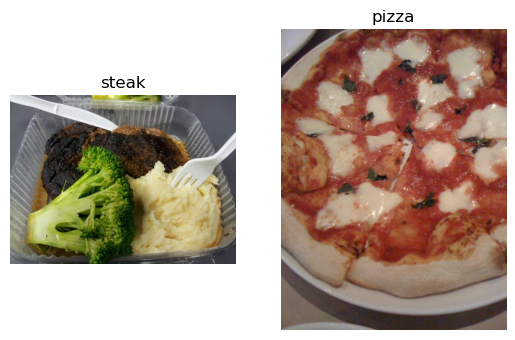

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img= view_random_image("pizza_steak/test/","pizza")

### `2. Preprocess the data`

In [18]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [19]:
#create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [20]:


# load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
images,labels= train_data.next()
len(images),len(labels)

(32, 32)

In [22]:
images[:2],images[0].shape

(array([[[[0.08627451, 0.02745098, 0.00784314],
          [0.08627451, 0.02745098, 0.00784314],
          [0.08627451, 0.02745098, 0.00784314],
          ...,
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628]],
 
         [[0.08627451, 0.02745098, 0.01568628],
          [0.08627451, 0.02745098, 0.01568628],
          [0.08235294, 0.02745098, 0.01568628],
          ...,
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628]],
 
         [[0.08235294, 0.02745098, 0.02352941],
          [0.08235294, 0.02745098, 0.02352941],
          [0.07450981, 0.03137255, 0.02352941],
          ...,
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628],
          [0.01960784, 0.        , 0.01568628]],
 
         ...,
 
         [[0.8745099 , 0.8705883 , 0.90196085],
          [0.87450

In [23]:
labels

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

### `3. Create a CNN model`

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

### this is our baseline

In [25]:

model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [26]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [27]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
len(train_data),len(test_data)

(47, 16)

### `4. Fit the model`

In [29]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(test_data))

Epoch 1/5


47/47 [==============================] - 13s 247ms/step - loss: 2.0644 - accuracy: 0.6107 - val_loss: 0.5364 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4586 - accuracy: 0.7900 - val_loss: 0.3817 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3388 - accuracy: 0.8607 - val_loss: 0.3848 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.2130 - accuracy: 0.9367 - val_loss: 0.3982 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.1087 - accuracy: 0.9767 - val_loss: 0.4524 - val_accuracy: 0.7900


### `5. Evaluate the model`


<Axes: >

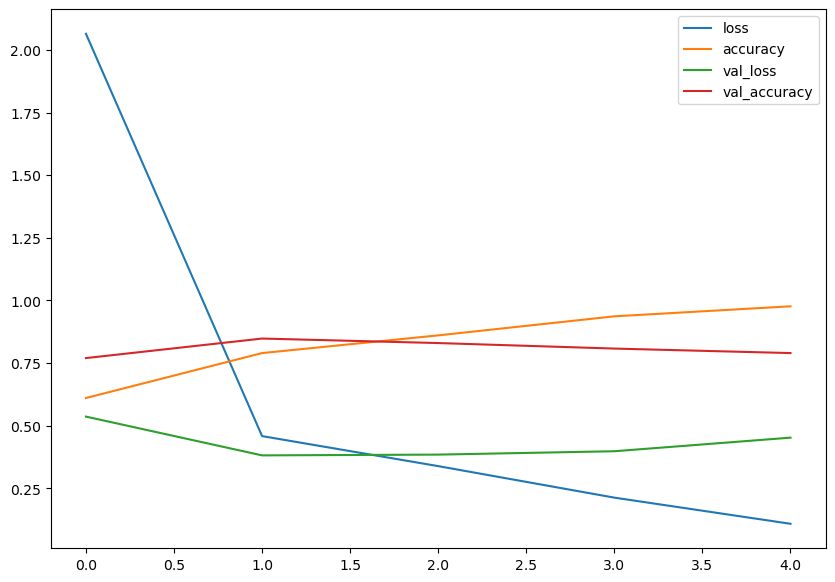

In [30]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [31]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot 
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

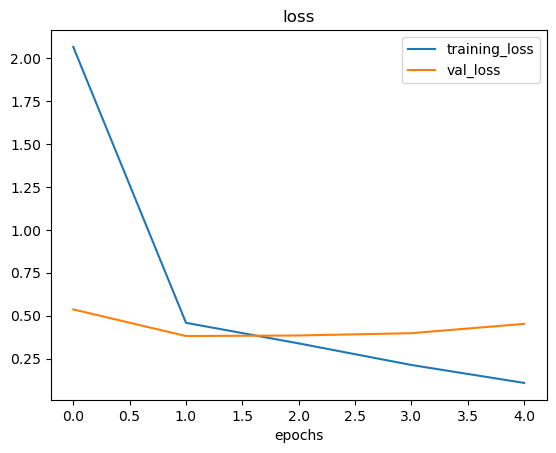

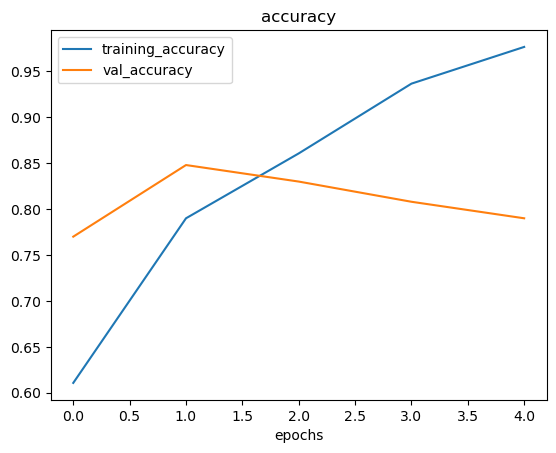

In [32]:
plot_loss_curves(history_4)

> ### `6. Adjust the model parameters`

    Fitting a machine learning model comes in 3 steps:

    0. Create a baseline
    1. Beat the baseline by overfitting a larger model
    2. Reduce overfitting

    Ways to induce overfitting:

    * Increase the number of conv layers
    * Increase the number of conv filters
    * Add another dense layer to the output of our flattened layer

    Reduce overfitting:
    * Add data augmentation
    * Add regularization layers (such as MaxPool2D)
    * Add more data ...


In [33]:
# create a model(new baseline)
model_5=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [34]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5670 - accuracy: 0.7113 - val_loss: 0.4935 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4705 - accuracy: 0.7893 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3984 - accuracy: 0.8253 - val_loss: 0.3270 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3785 - accuracy: 0.8293 - val_loss: 0.3169 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3750 - accuracy: 0.8400 - val_loss: 0.3019 - val_accuracy: 0.8900


In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 10)   

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## `SEE THE PARAMS.... SO LESS!!`     MaxPool +1

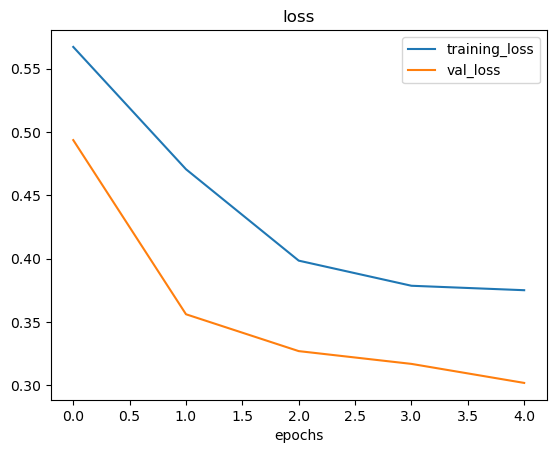

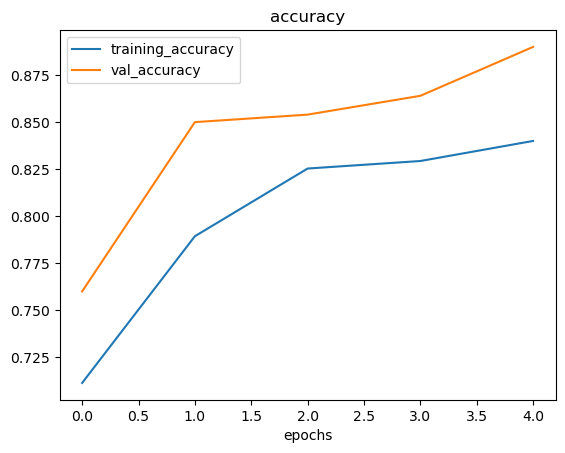

In [38]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augumentation (rotates the img in some angle and try to find patterns)

In [56]:
#create imgdatagenerator training with data agumentation

train_datagen_agumented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

# create imagedatagenearator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#same for test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

In [57]:
#import data and augment it from training directory
print("Augmented training data")
train_datagen_agumented=train_datagen_agumented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)

#create non-augumented train data batches
print("Non-Augmented training data")
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

#create non-augumented test data batches
print("Non-Augmented testing data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.


Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented testing data
Found 500 images belonging to 2 classes.


In [58]:
images, labels=train_data.next()
agumented_images, agumented_labels=train_datagen_agumented.next()

showing image number: 16


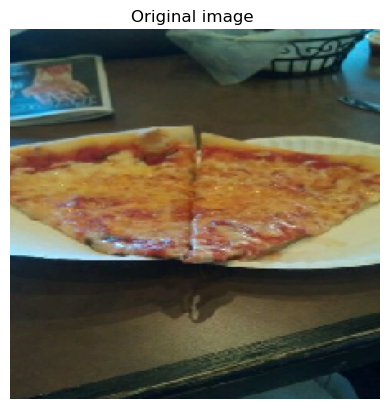

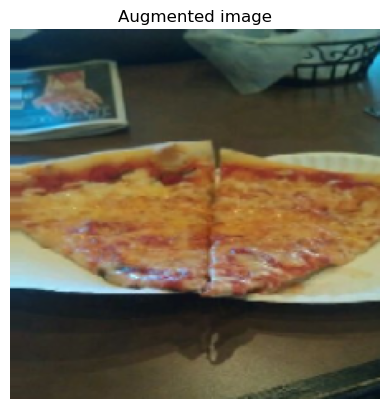

In [59]:
#show the original image and augmented image

import random
random_number=random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image ")
plt.axis(False)
plt.figure()
plt.imshow(agumented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

## Lets add augmented traing data to our model

In [64]:
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6=model_6.fit(train_datagen_agumented,
            epochs=5,
            steps_per_epoch=len(train_datagen_agumented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 390ms/step - loss: 0.7319 - accuracy: 0.5253 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 17s 371ms/step - loss: 0.6873 - accuracy: 0.5273 - val_loss: 0.6739 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 17s 364ms/step - loss: 0.6913 - accuracy: 0.5960 - val_loss: 0.6365 - val_accuracy: 0.5700
Epoch 4/5
47/47 [==============================] - 18s 374ms/step - loss: 0.6508 - accuracy: 0.6607 - val_loss: 0.5510 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 17s 363ms/step - loss: 0.6162 - accuracy: 0.6780 - val_loss: 0.5326 - val_accuracy: 0.7280


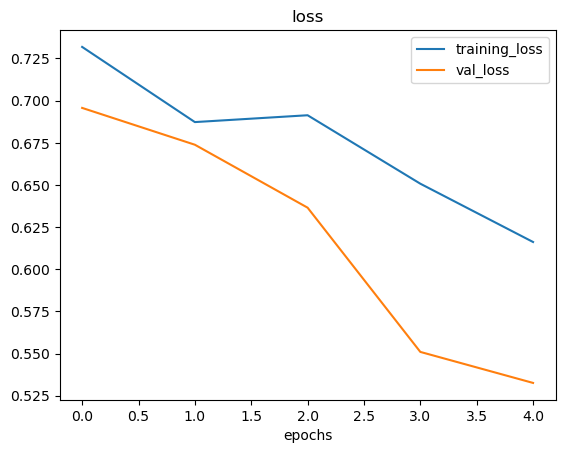

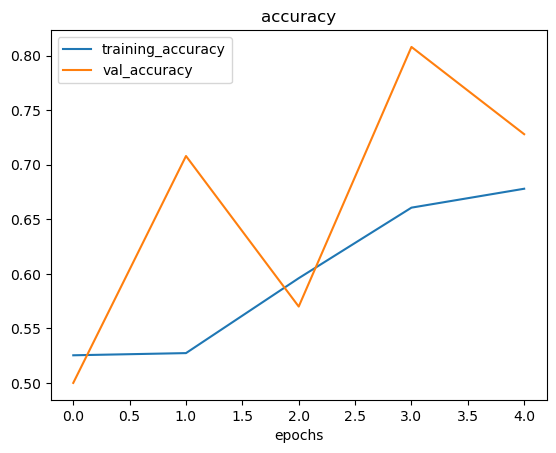

In [65]:
plot_loss_curves(history=history_6)

### Lets shuffle the data by changing `shuffle=True`

In [69]:
#create imgdatagenerator training with data agumentation

train_datagen_agumented_shuff=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

# create imagedatagenearator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#same for test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

In [70]:
#import data and augment it from training directory
print("Augmented training data")
train_datagen_agumented_shuff=train_datagen_agumented_shuff.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True)

#create non-augumented train data batches
print("Non-Augmented training data")
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

#create non-augumented test data batches
print("Non-Augmented testing data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.


Non-Augmented testing data
Found 500 images belonging to 2 classes.


In [71]:
images, labels=train_data.next()
agumented_images, agumented_labels=train_datagen_agumented.next()

showing image number: 11


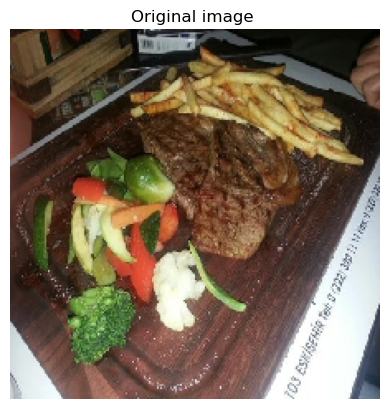

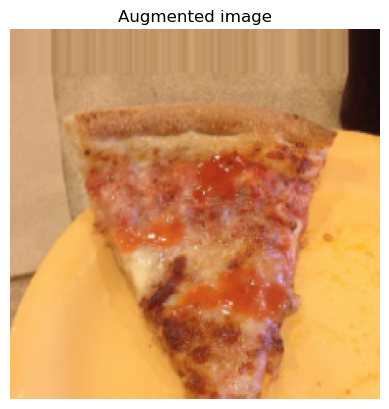

In [74]:
#show the original image and augmented image

import random
random_number=random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image ")
plt.axis(False)
plt.figure()
plt.imshow(agumented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

In [77]:
model_7=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7=model_7.fit(train_datagen_agumented_shuff,
            epochs=5,
            steps_per_epoch=len(train_datagen_agumented_shuff),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 387ms/step - loss: 0.6689 - accuracy: 0.5720 - val_loss: 0.5027 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 17s 361ms/step - loss: 0.5559 - accuracy: 0.7300 - val_loss: 0.3960 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4810 - accuracy: 0.7820 - val_loss: 0.3980 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 16s 349ms/step - loss: 0.4731 - accuracy: 0.7907 - val_loss: 0.3612 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4662 - accuracy: 0.7840 - val_loss: 0.3294 - val_accuracy: 0.8440


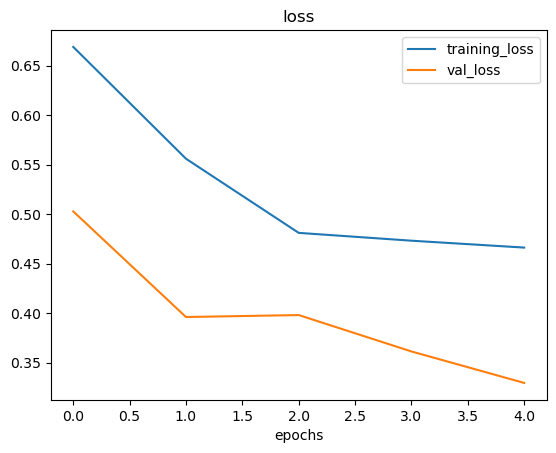

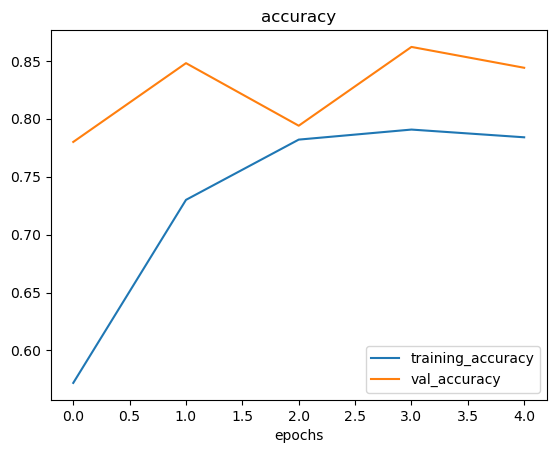

In [78]:
plot_loss_curves(history=history_7)


### `7. Repeat until satisfied (experiment, experiment, experiment) `

Since we've already beaten our baseline, there are a few
things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more Conv2D/
`MaxPool2D layers)
* Increase the number of filters in each convolutional layer
(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image
model has learn and adjust it for our own use case.

In [80]:
model_8=Sequential([
    Conv2D(32,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8=model_8.fit(train_datagen_agumented_shuff,
            epochs=10,
            steps_per_epoch=len(train_datagen_agumented_shuff),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 501ms/step - loss: 0.6850 - accuracy: 0.5440 - val_loss: 0.5702 - val_accuracy: 0.7360
Epoch 2/10
47/47 [==============================] - 24s 504ms/step - loss: 0.6038 - accuracy: 0.6760 - val_loss: 0.4757 - val_accuracy: 0.7880
Epoch 3/10
47/47 [==============================] - 24s 504ms/step - loss: 0.5433 - accuracy: 0.7447 - val_loss: 0.4127 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 490ms/step - loss: 0.5174 - accuracy: 0.7633 - val_loss: 0.4647 - val_accuracy: 0.7880
Epoch 5/10
47/47 [==============================] - 23s 484ms/step - loss: 0.4997 - accuracy: 0.7687 - val_loss: 0.3601 - val_accuracy: 0.8380
Epoch 6/10
47/47 [==============================] - 24s 508ms/step - loss: 0.5075 - accuracy: 0.7667 - val_loss: 0.3631 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 23s 489ms/step - loss: 0.4979 - accuracy: 0.7720 - val_loss: 0.3855 - val_accuracy: 0.8480

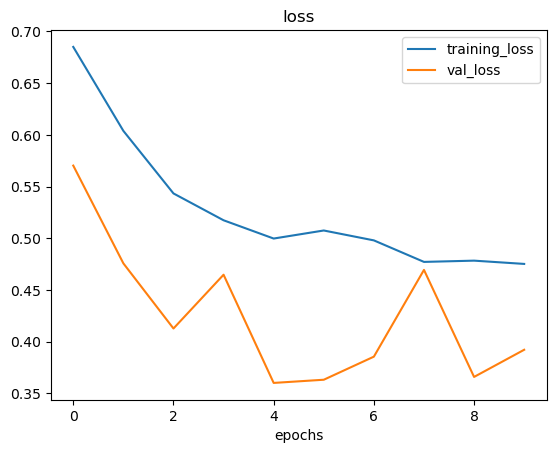

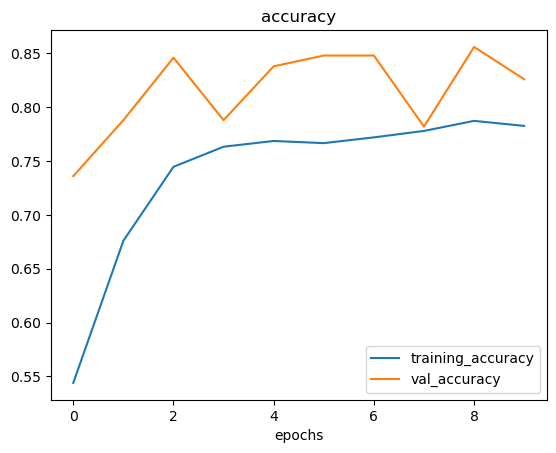

In [81]:
plot_loss_curves(history_8)

## Make a prediction on our own custom data

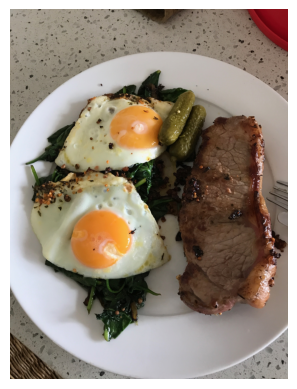

In [89]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak= mpimg.imread("pizza_steak/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [90]:
steak.shape

(4032, 3024, 3)

In [91]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [92]:
#create a fxn to import an image and reshape it to be able to used with our custom data

def load_and_prep_image(filename,img_shape=224):
    
    #read the image
    img=tf.io.read_file(filename)
    #decode the read file into a tensor
    img=tf.image.decode_image(img)
    #resize the image
    img=tf.image.resize(img,size=[img_shape,img_shape])
    #rescale the image b/w 0-1
    img=img/255.
    return img

In [93]:
steak=load_and_prep_image("pizza_steak/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [100]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 31ms/step


array([[0.87087095]], dtype=float32)

### The above result is the prediction probability. Lets make it intresting...

In [97]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [103]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

# CORRECT!

In [105]:
def pred_and_plot(model,filename,class_names=class_names):
    
    img=load_and_prep_image(filename)

    pred=model.predict(tf.expand_dims(img,axis=0))

    pred_class=class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f"prediction: {pred_class}")
    plt.axis(False);

In [154]:
pred

array([[0.87087095]], dtype=float32)

1/1 [==============================] - 0s 22ms/step


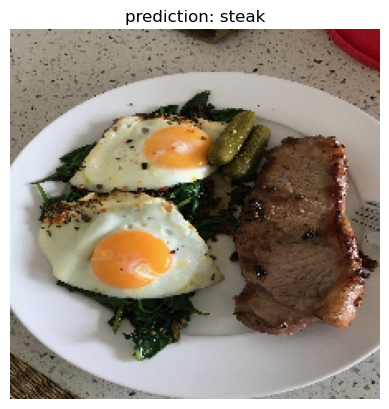

In [106]:
pred_and_plot(model_7,"pizza_steak/03-steak.jpeg")

1/1 [==============================] - 0s 24ms/step


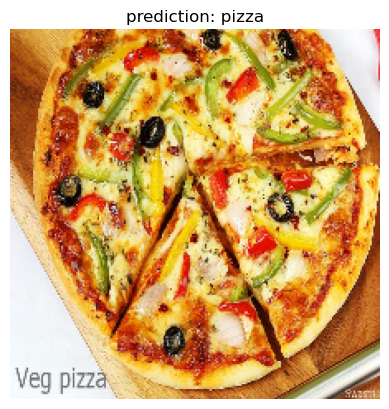

In [107]:
pred_and_plot(model_7,"pizza_steak/pizza-recipe-1.jpg")

1/1 [==============================] - 0s 30ms/step


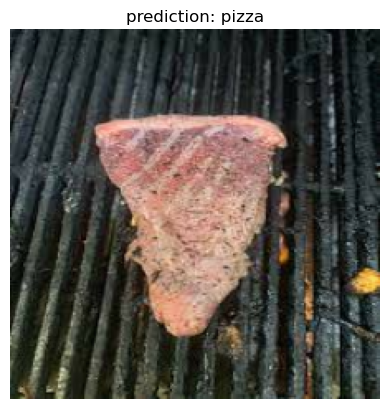

In [108]:
pred_and_plot(model_7,"pizza_steak/pizza_like_steak.jpeg")


1/1 [==============================] - 0s 26ms/step


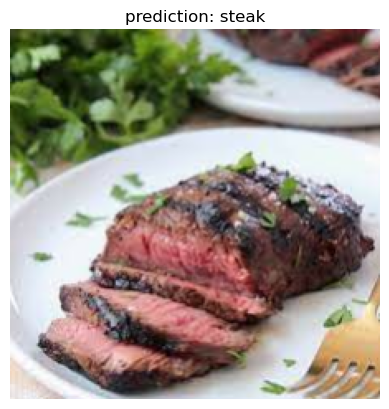

In [113]:
pred_and_plot(model_7,"pizza_steak/steak.jpeg")


1/1 [==============================] - 0s 27ms/step


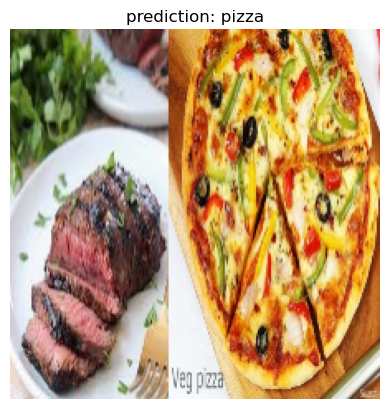

In [114]:
pred_and_plot(model_7,"pizza_steak/pizza_and_steak.jpg")



# Multi-class Image Classification

We've just been through a bunch of the following steps with a
binary classification problem (pizza vs. steak), now we're
going to step things up a notch with 10 classes of food
(multi-class classification).

1. Become one with the data
3. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try
to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [139]:
# 1. Become one with the data

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data\test.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data\test\fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data\test\hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data\test\pizza.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ramen.
There are 0 directories and 250 images in 10_food_classes_all_data\test\steak.
There are 0 directories and 250 images in 10_food_classes_all_data\test\sushi.
There are 10 directories and 0 ima

In [140]:
#setup train amd test directories

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

#Lets get our class_names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

image shape: (512, 512, 3)


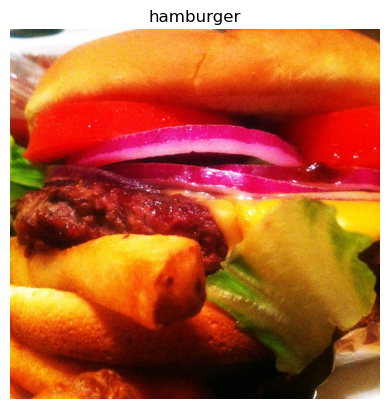

In [141]:
# visualize

import random
img= view_random_image(target_dir=train_dir,target_class=random.choice(class_names))


In [142]:
# 2. Preprocess the model

#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="categorical",
                                           batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [145]:
# 3. Create the model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_9=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [146]:
# 4. Fit the model

history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 241ms/step - loss: 2.2195 - accuracy: 0.2179 - val_loss: 1.9923 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 1.9450 - accuracy: 0.3160 - val_loss: 1.9382 - val_accuracy: 0.3136
Epoch 3/5
235/235 [==============================] - 51s 216ms/step - loss: 1.7647 - accuracy: 0.3941 - val_loss: 1.9664 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 1.4361 - accuracy: 0.5193 - val_loss: 2.0952 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.9583 - accuracy: 0.6761 - val_loss: 2.6316 - val_accuracy: 0.2564


In [147]:
# 5. Evaluate the model

model_9.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 2.6316 - accuracy: 0.2564


[2.631629705429077, 0.2563999891281128]

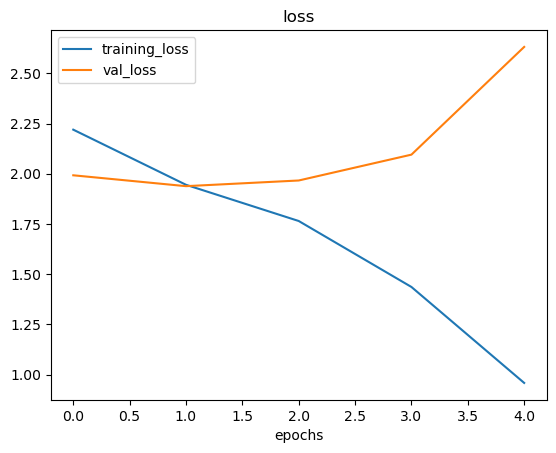

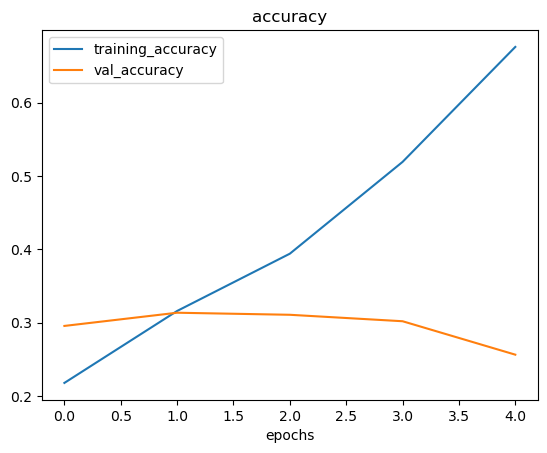

In [148]:
plot_loss_curves(history_9)

In [149]:
# 6. Adjust the hyperparameters (to reduce overfitting)

# Augmented

model_10=tf.keras.models.clone_model(model_9)

In [152]:
# 6. Adjust the hyperparameters (to reduce overfitting)

# Augmented


train_datagen_agumented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)



train_datagen_agumented_shuff=train_datagen_agumented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)



Found 7500 images belonging to 10 classes.


In [153]:
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

model_10.fit(train_datagen_agumented_shuff,
             epochs=5,
             steps_per_epoch=len(train_datagen_agumented_shuff),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 99s 415ms/step - loss: 2.2380 - accuracy: 0.1707 - val_loss: 2.0645 - val_accuracy: 0.2556
Epoch 2/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0964 - accuracy: 0.2545 - val_loss: 1.9531 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 98s 416ms/step - loss: 2.0061 - accuracy: 0.3044 - val_loss: 1.8831 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 97s 414ms/step - loss: 1.9497 - accuracy: 0.3235 - val_loss: 1.8061 - val_accuracy: 0.3820
Epoch 5/5
235/235 [==============================] - 92s 392ms/step - loss: 1.9086 - accuracy: 0.3381 - val_loss: 1.7642 - val_accuracy: 0.3992


In [155]:
#change in the fxn due to categorical data

def pred_and_plot(model,filename,class_names=class_names):
    
    img=load_and_prep_image(filename)
 
    pred=model.predict(tf.expand_dims(img,axis=0))

    if len(pred[0]>1):
        pred_class=class_names[tf.argmax(pred[0])]
    else:
        pred_class=class_names[int(tf.round(pred[0]))]

    plt.imshow(img)
    plt.title(f"prediction: {pred_class}")
    plt.axis(False);

In [156]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 122ms/step - loss: 1.7642 - accuracy: 0.3992


[1.7642039060592651, 0.3991999924182892]

1/1 [==============================] - 0s 75ms/step


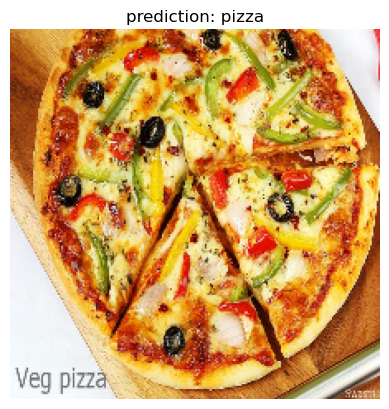

In [158]:
pred_and_plot(model_10,"pizza_steak\pizza-recipe-1.jpg")

1/1 [==============================] - 0s 27ms/step


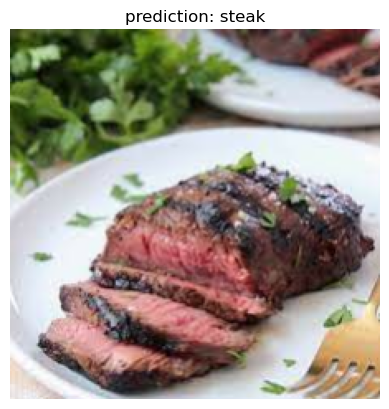

In [159]:
pred_and_plot(model_10,"pizza_steak\steak.jpeg")


1/1 [==============================] - 0s 24ms/step


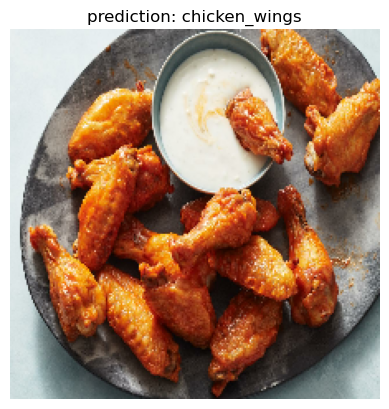

In [160]:
pred_and_plot(model_10,"10_food_classes_all_data\chicken_wings1.jpeg")


1/1 [==============================] - 0s 34ms/step


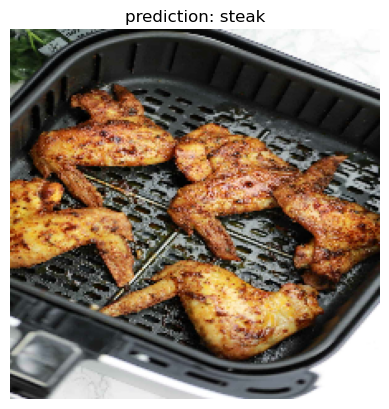

In [161]:
pred_and_plot(model_10,"10_food_classes_all_data\chicken_wings2.jpeg")


1/1 [==============================] - 0s 25ms/step


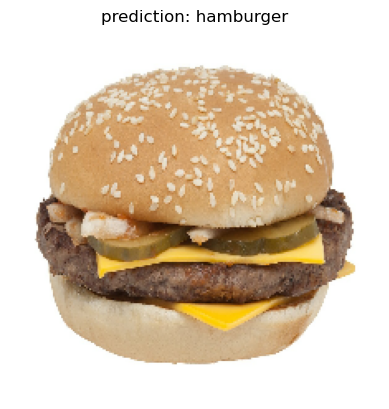

In [163]:
pred_and_plot(model_10,"10_food_classes_all_data\hamburger1.jpg")


1/1 [==============================] - 0s 28ms/step


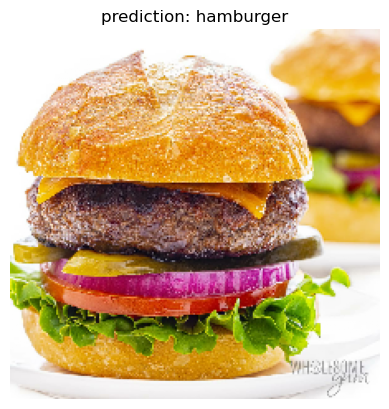

In [164]:
pred_and_plot(model_10,"10_food_classes_all_data\hamburger2.jpg")


1/1 [==============================] - 0s 42ms/step


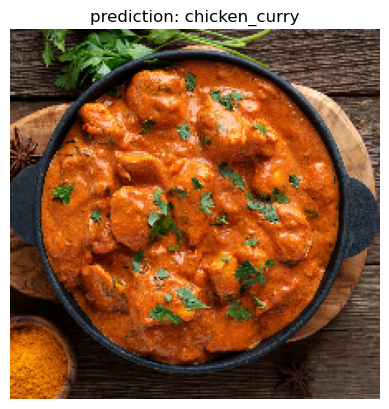

In [169]:
pred_and_plot(model_10,"10_food_classes_all_data\chicken_curry1.jpg")


1/1 [==============================] - 0s 29ms/step


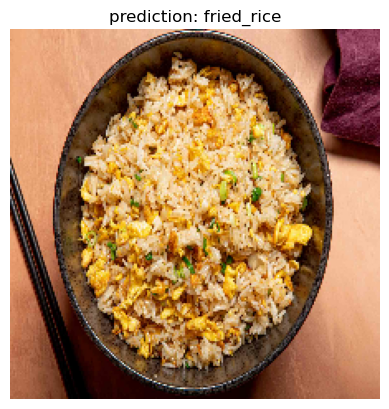

In [173]:
pred_and_plot(model_10,"10_food_classes_all_data\Fried_rice1.jpg")


1/1 [==============================] - 0s 23ms/step


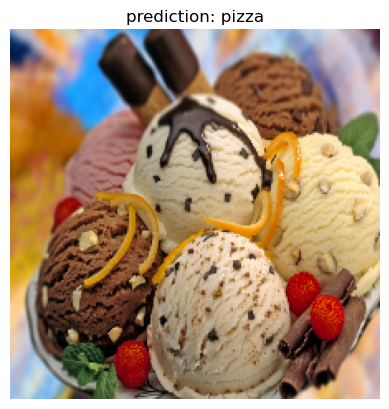

In [174]:

pred_and_plot(model_10,"10_food_classes_all_data\ice_cream.jpg")


1/1 [==============================] - 0s 27ms/step


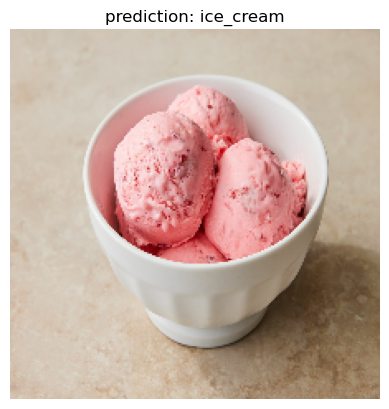

In [175]:
pred_and_plot(model_10,"10_food_classes_all_data\ice_cream2.jpg")


# Saving and loading a model

In [176]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [177]:
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 120ms/step - loss: 1.7642 - accuracy: 0.3992


[1.7642039060592651, 0.3991999924182892]

In [178]:
model_10.evaluate(test_data)==loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 115ms/step - loss: 1.7642 - accuracy: 0.3992


True